# Time Series Analysis Project - Stock Analysis

# Problem Definition
# Investors are always in dilemma on the best stock to invest in, to maximize return on investment
## The project aims to:
## 1. etablish stock price movement by conducting a trend Analysis of Stock performance and forecasting stock price using FB prophet
## 2. confirm the return on investment (ROI) on a stock with a view to determine its profitability by considering the ROI of the stock over a 4-year period.

# Procedure:
1. The necessary libraries were imported
2. The timeframe of the data to be downloaded from Yahoo Finance was defined and the necessary Ticker symbol was inserted for loading
3. The datasets were preprocessed to prepare the data for analysis (index was reset, necessary data were extracted
4. The datasets were imported from Yahoo Finance and aggregated
5. The model was trained to fit the prepocessed data using FB Prophet
6. The model was evaluated to detect anomalies
7. The model was used to predict the price of TSLA stock using Matplotlib and FB prophet.

## Installing the necessary modules

In [1]:
!pip install prophet

In [2]:
!pip install --upgrade yfinance

In [3]:
!pip install mplfinance

In [4]:
!pip install plotly>=6.1.1

## Importing the necessary modules

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import prophet
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
#from .autonotebook import tqdm as notebook_tqdm

import warnings
warnings.simplefilter(action='ignore')

import yfinance as yf
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
#yf.pdr_override() # <== that's all it takes :-)

C:\Users\segun\anaconda3\Lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## Loading the stock data, Cleaning it, Training the data and Defining the Time Frame of the Output

Available Stock Exchanges:
- USA
- JAPAN
- INDIA
- UK
- FRANCE
- GERMANY
- CANADA
- AUSTRALIA
- HONG KONG
- CHINA
- SOUTH KOREA
- SOUTH AFRICA



Enter the country of the stock exchange:  usa
Enter the ticker symbol (without suffix):  aapl
Enter start date (YYYY-MM-DD):  2020-01-01
Enter end date (YYYY-MM-DD):  2025-07-05


Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed



Last 5 rows of raw data for AAPL:
Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
1378   2025-06-27  201.080002  203.220001  200.000000  201.889999  73188600
1379   2025-06-30  205.169998  207.389999  199.259995  202.009995  91912800
1380   2025-07-01  207.820007  210.190002  206.139999  206.669998  78788900
1381   2025-07-02  212.440002  213.339996  208.139999  208.910004  67941800
1382   2025-07-03  213.550003  214.649994  211.809998  212.149994  34955800

Showing price trend chart...


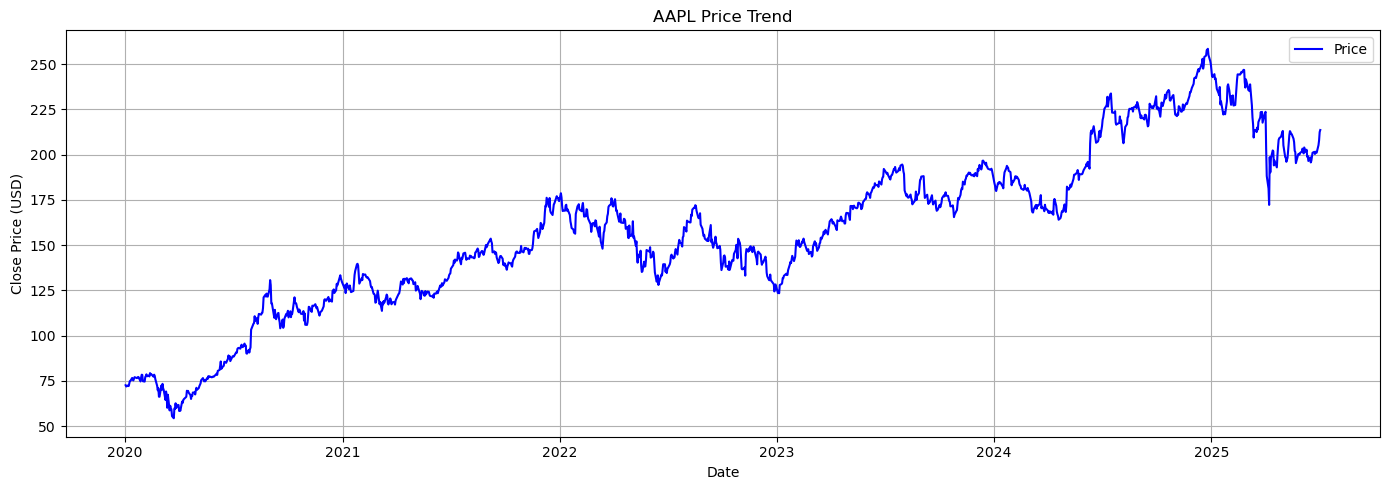

DEBUG	Task(Task-4) cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None



Calculating ROI...

ROI for AAPL from 2020-01-02 to 2025-07-03: 194.06%


DEBUG	Task(Task-4) cmdstanpy:model.py:__init__()- Adding TBB (C:\Users\segun\anaconda3\Lib\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH
DEBUG	Task(Task-4) cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\segun\AppData\Local\Temp\tmpfyddpq8z\a7glvg4h.json
DEBUG	Task(Task-4) cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\segun\AppData\Local\Temp\tmpfyddpq8z\0z3_7cjn.json
DEBUG	Task(Task-4) cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	Task(Task-4) cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	Task(Task-4) cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['C:\\Users\\segun\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=22004', 'data', 'file=C:\\Users\\segun\\AppData\\Local\\Temp\\tmpfyddpq8z\\a7glvg4h.json', 'init=C:\\Users\\segun\\AppData\\Local\\Temp\\tmpfyddpq8z\\0z3_7cjn.json', 'output', 'file=C:\\Users\\segun\\AppData\\Local\\Temp


Showing forecast plot...


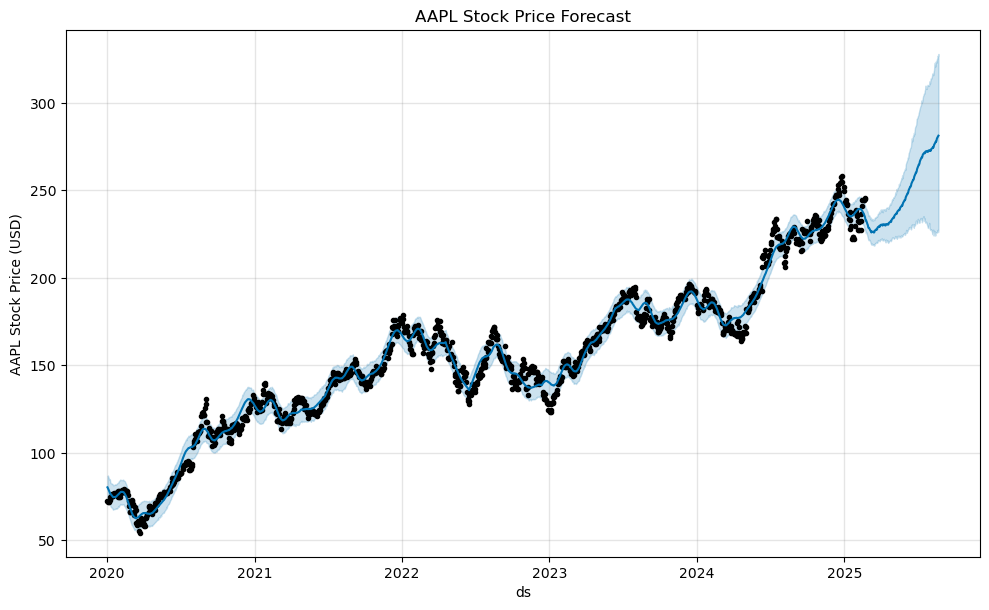


Sample of forecast with labeled sets:
             ds        yhat                set
1464 2025-08-13  276.700157  future prediction
1465 2025-08-14  277.089735  future prediction
1466 2025-08-15  277.730151  future prediction
1467 2025-08-16  277.658464  future prediction
1468 2025-08-17  278.187215  future prediction
1469 2025-08-18  279.349388  future prediction
1470 2025-08-19  279.913253  future prediction
1471 2025-08-20  280.302417  future prediction
1472 2025-08-21  280.632495  future prediction
1473 2025-08-22  281.164815  future prediction


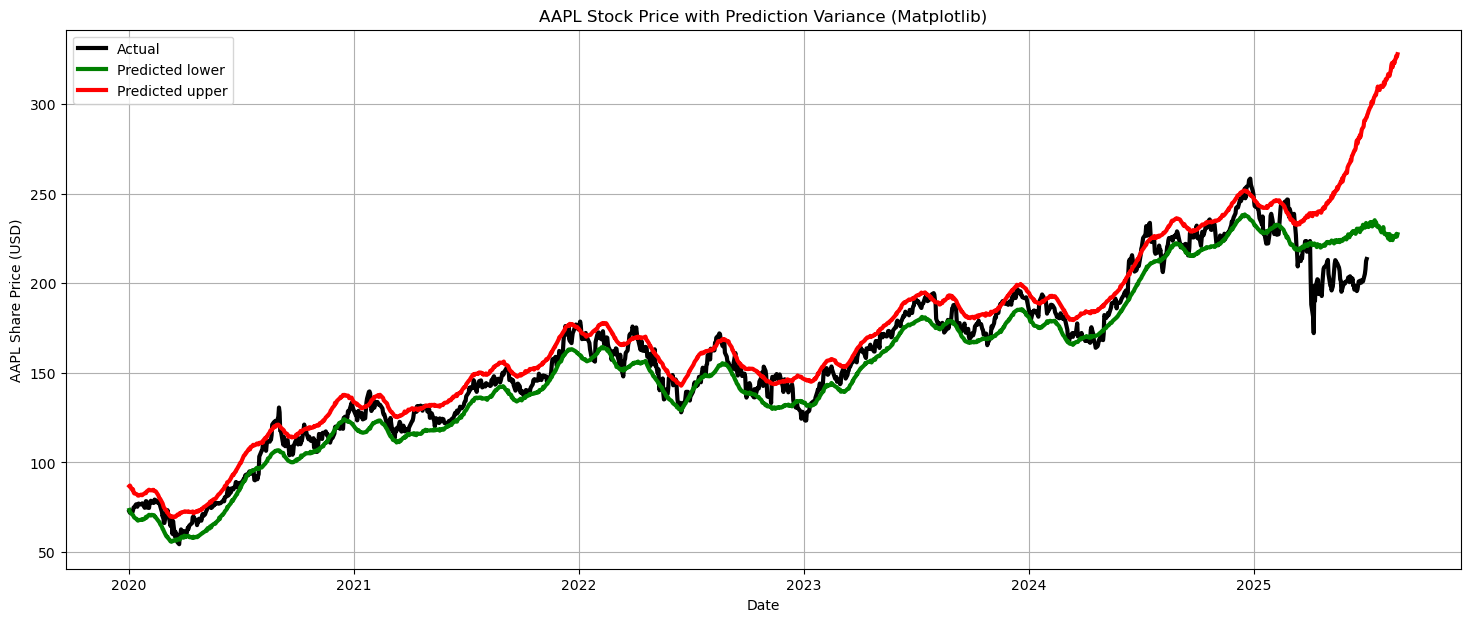

In [6]:

import yfinance as yf
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

# Dictionary of exchanges
exchange_suffixes = {
    "USA": "",
    "JAPAN": ".T",
    "INDIA": ".NS",
    "UK": ".L",
    "FRANCE": ".PA",
    "GERMANY": ".DE",
    "CANADA": ".TO",
    "AUSTRALIA": ".AX",
    "HONG KONG": ".HK",
    "CHINA": ".SS",
    "SOUTH KOREA": ".KS",
    "SOUTH AFRICA": ".JO"
}

def download_data(country, ticker_base, start_date, end_date):
    country = country.upper()
    ticker_base = ticker_base.upper()
    if country not in exchange_suffixes:
        raise ValueError(f"The stock exchange for '{country}' is not supported.")
    suffix = exchange_suffixes[country]
    ticker = ticker_base + suffix

    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        raise ValueError(f"No data found for ticker '{ticker}'.")
    data.reset_index(inplace=True)
    return data, ticker

def prepare_prophet_data(data):
    df = data[['Date', 'Close']].copy()
    df.columns = ['ds', 'y']
    return df

def forecast_stock(data, forecast_days=91):
    df_prophet = Prophet(
        changepoint_prior_scale=0.15,
        yearly_seasonality=True,
        daily_seasonality=True
    )

    # Train the model excluding the last `forecast_days`
    df_prophet.fit(data[:-forecast_days])

    # Forecast for 2 * forecast_days
    future = df_prophet.make_future_dataframe(periods=forecast_days * 2, freq='D')
    forecast = df_prophet.predict(future)

    # Define cutoff and label forecast rows
    cutoff_date = data['ds'].iloc[-forecast_days]
    last_date = data['ds'].iloc[-1]

    forecast['set'] = forecast['ds'].apply(
        lambda date: (
            'historical withheld' if cutoff_date < date <= last_date else
            'future prediction' if date > last_date else
            'train'
        )
    )

    return df_prophet, forecast

def plot_prediction_variance(data, forecast, ticker):
    fig = plt.gcf()
    fig.set_size_inches(18, 7)
    plt.plot(data['ds'], data['y'], linestyle='-', label="Actual", linewidth=3, color='black')
    plt.plot(forecast['ds'], forecast['yhat_lower'], linestyle='-', label="Predicted lower", linewidth=3, color='green')
    plt.plot(forecast['ds'], forecast['yhat_upper'], linestyle='-', label="Predicted upper", linewidth=3, color='red')
    plt.grid(True)
    plt.legend()
    plt.title(f'{ticker} Stock Price with Prediction Variance (Matplotlib)')
    plt.ylabel(f'{ticker} Share Price (USD)')
    plt.xlabel('Date')
    plt.show()

    # Plotly
    trace_actual = go.Scatter(name='Actual price', mode='markers',
        x=list(data['ds']), y=list(data['y']),
        marker=dict(color='black', line=dict(width=2)))
    trace_trend = go.Scatter(name='Trend', mode='lines',
        x=list(forecast['ds']), y=list(forecast['yhat']),
        line=dict(color='red', width=3))
    trace_upper = go.Scatter(name='Upper band', mode='lines',
        x=list(forecast['ds']), y=list(forecast['yhat_upper']),
        line=dict(color='#57b88f'), fill='tonexty')
    trace_lower = go.Scatter(name='Lower band', mode='lines',
        x=list(forecast['ds']), y=list(forecast['yhat_lower']),
        line=dict(color='#1705ff'))

    data_plotly = [trace_actual, trace_trend, trace_lower, trace_upper]
    layout = go.Layout(title=f'{ticker} Stock Price Estimation Using FB Prophet (Plotly)',
        xaxis=dict(title='Date'),
        yaxis=dict(title=f'{ticker} Price (USD)'))
    fig_plotly = go.Figure(data=data_plotly, layout=layout)
    py.plot(fig_plotly)

def plot_price_trend(data, ticker):
    plt.figure(figsize=(14, 5))
    plt.plot(data['Date'], data['Close'], color='blue', label='Price')
    plt.title(f'{ticker} Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculate_roi(data, ticker):
    start_price = float(data['Close'].iloc[0])
    end_price = float(data['Close'].iloc[-1])
    roi = ((end_price - start_price) / start_price) * 100
    print(f"\nROI for {ticker} from {data['Date'].iloc[0].date()} to {data['Date'].iloc[-1].date()}: {roi:.2f}%")

def main():
    print("Available Stock Exchanges:")
    for c in exchange_suffixes:
        print(f"- {c}")

    country = input("\nEnter the country of the stock exchange: ")
    ticker_base = input("Enter the ticker symbol (without suffix): ")
    start_date_str = input("Enter start date (YYYY-MM-DD): ")
    end_date_str = input("Enter end date (YYYY-MM-DD): ")

    try:
        start_date = dt.datetime.strptime(start_date_str, "%Y-%m-%d")
        end_date = dt.datetime.strptime(end_date_str, "%Y-%m-%d")
    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD.")
        return

    try:
        data, ticker = download_data(country, ticker_base, start_date, end_date)
    except ValueError as e:
        print(f"Error: {e}")
        return

    print(f"\nLast 5 rows of raw data for {ticker}:")
    print(data.tail())

    print("\nShowing price trend chart...")
    plot_price_trend(data, ticker)

    print("\nCalculating ROI...")
    calculate_roi(data, ticker)

    df_prophet_data = prepare_prophet_data(data)
    forecast_days = 91

    model, forecast = forecast_stock(df_prophet_data, forecast_days)

    print("\nShowing forecast plot...")
    fig_forecast = model.plot(forecast, xlabel='ds', ylabel=f'{ticker} Stock Price (USD)')
    plt.title(f'{ticker} Stock Price Forecast')
    plt.show()

    print("\nSample of forecast with labeled sets:")
    print(forecast[['ds', 'yhat', 'set']].tail(10))

    plot_prediction_variance(df_prophet_data, forecast, ticker)

if __name__ == "__main__":
    main()